# Baccarelli Lab AWS RONIN tutorial_1
This is the tutorial#1: 
- Login
- Create and launch HPC machine
- Create and launch HPC autoscale cluster
- RONIN Link 
- Navigate RONIN with command line and ubuntu desktop (/shared; /apps; /)

### by Yike Shen, 06/02/2021

Before login, contact Tess Bloomquist to obtain an account from AWS RONIN
Columbia Mailman HPC Resources contact: Rebecca Yohannes

# Note: Please turn off your machine after you are done with jobs. Running machine costs money.

## Step1: Login to AWS RONIN
<br>
    Instruction:https://blog.ronin.cloud/login-to-ronin/
    <br>
    Note: Change default temporary password; Use Columbia Duo mobile for multifactor authentification setup
<br>
After successful login, click and enter main page:

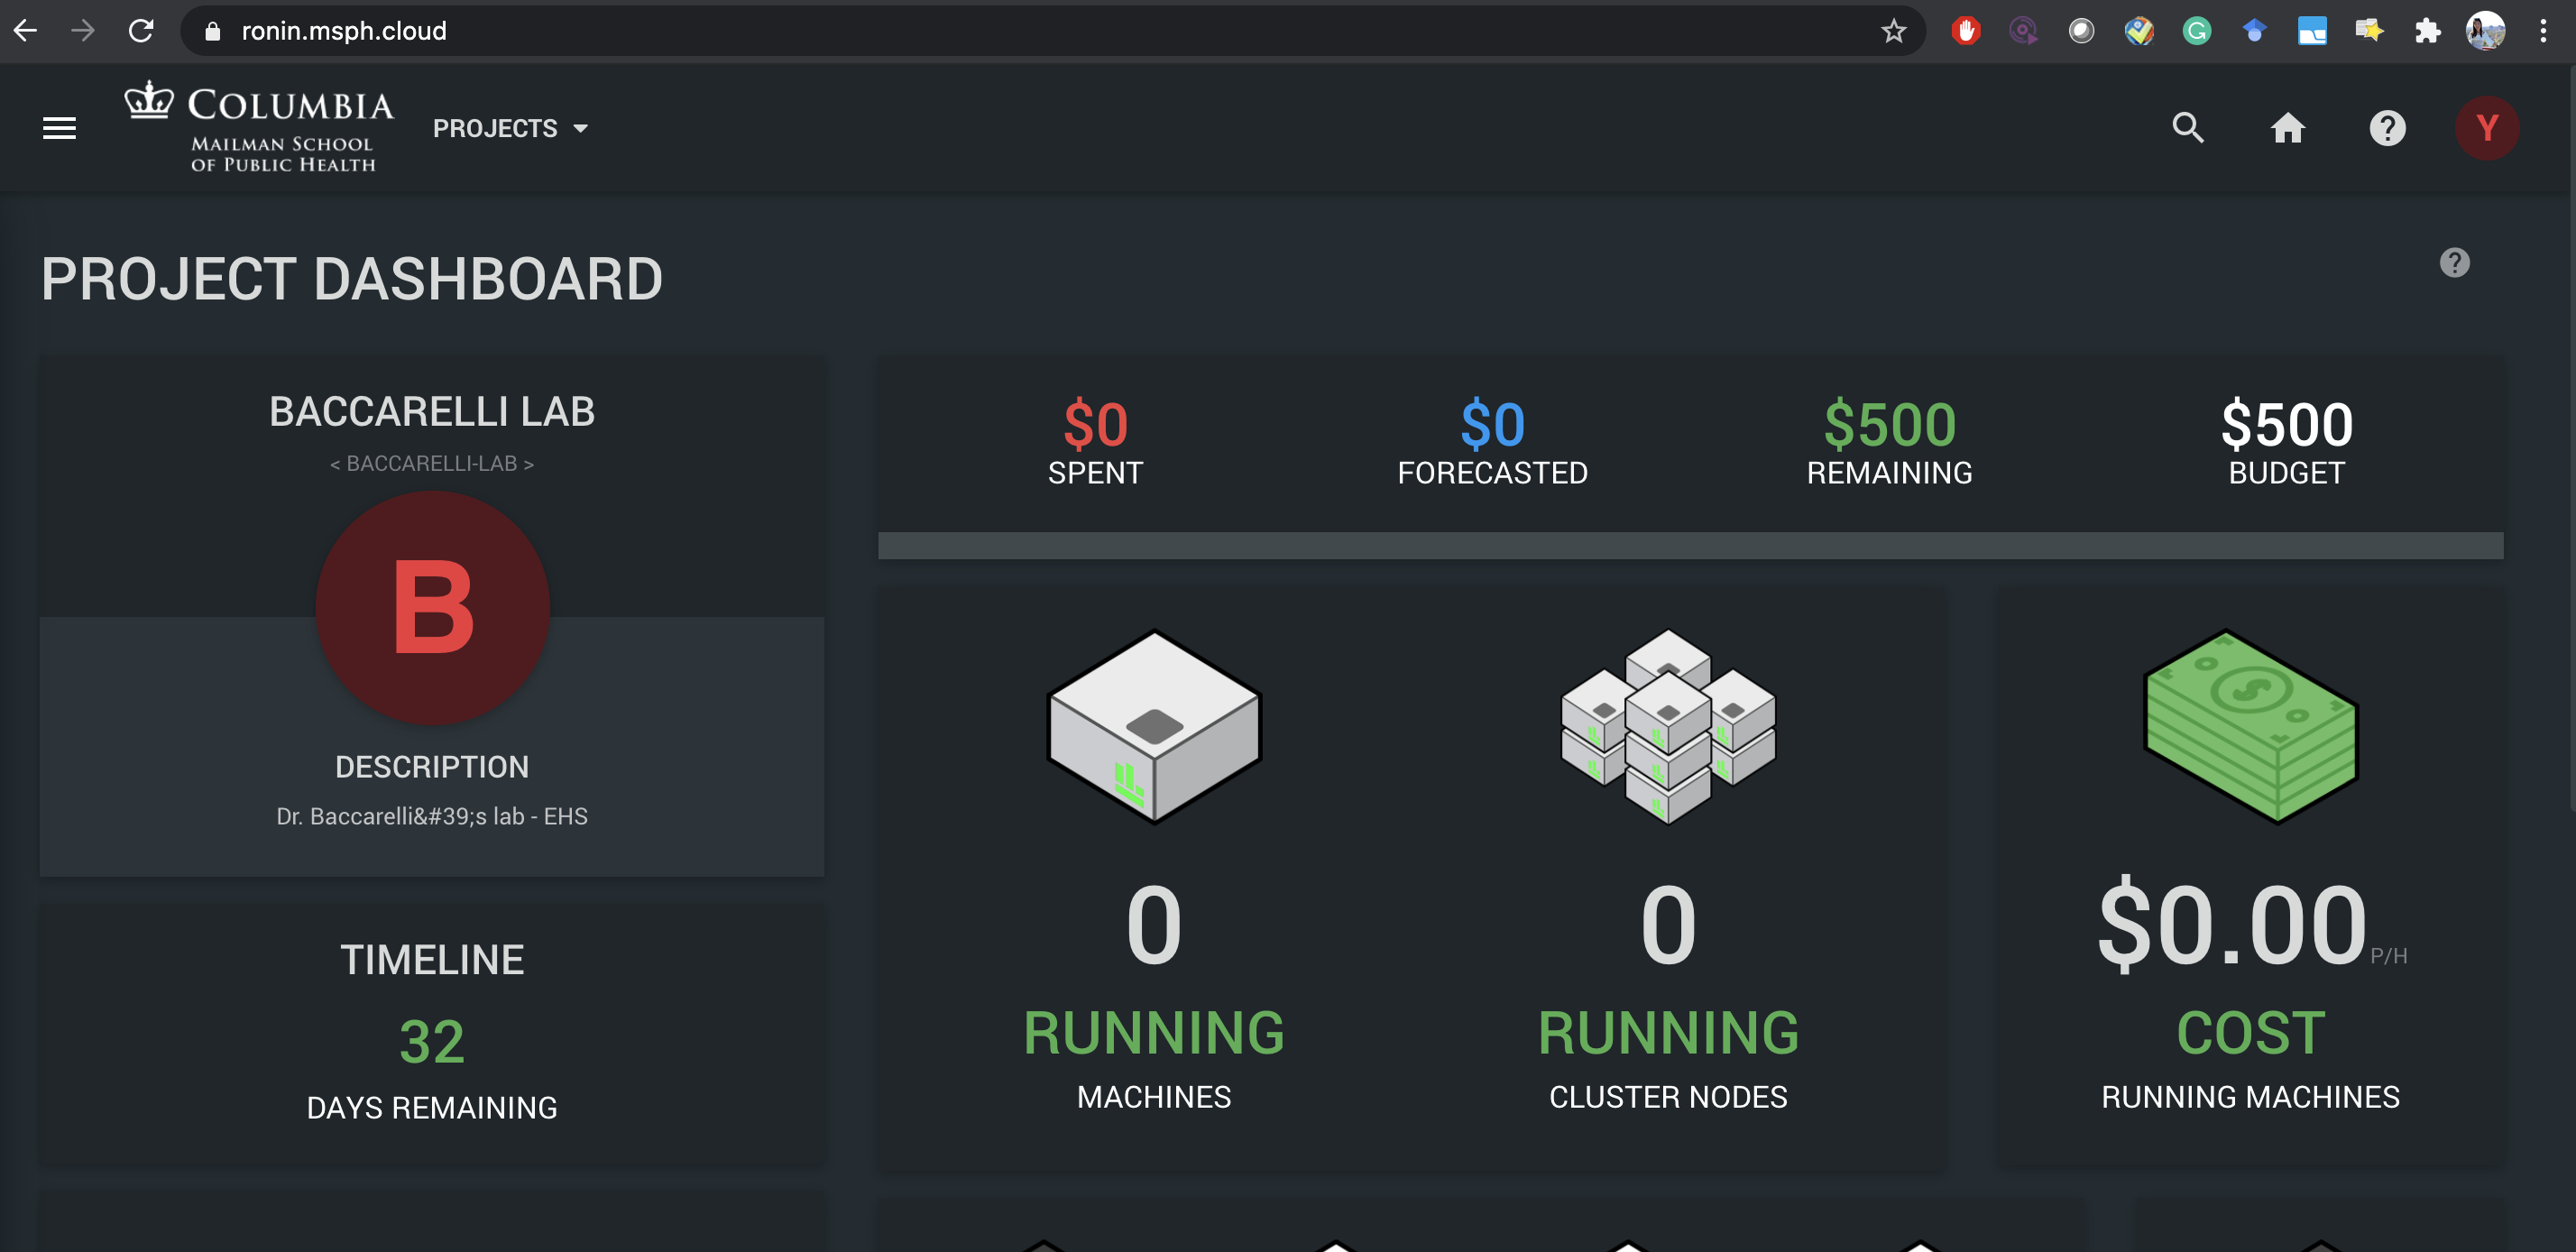

# Important: Determine if you will use slurm scheduler to submit jobs
## Step2: Create your own machine-No Slurm scheduler
<br>
Follow the instruction: https://blog.ronin.cloud/create-a-machine/
<br>
Note: launching your machine according to your computation need
<br>
ATTENTION: If you are using linux machine, which you will use the command line interface, you will need to create your access key BEFORE launching AWS RONIN;Keep your key confidential as anyone can login to your machine with your key!

Copy your cloud address: e.g.shen-test2.msph.cloud; Download your access key
<br>
This is the basic machine, you cannot submit a slurm job on this machine.
<br>
Root drive for installing pipelines or dependencies
<br>
SDD is your home directory
<br>


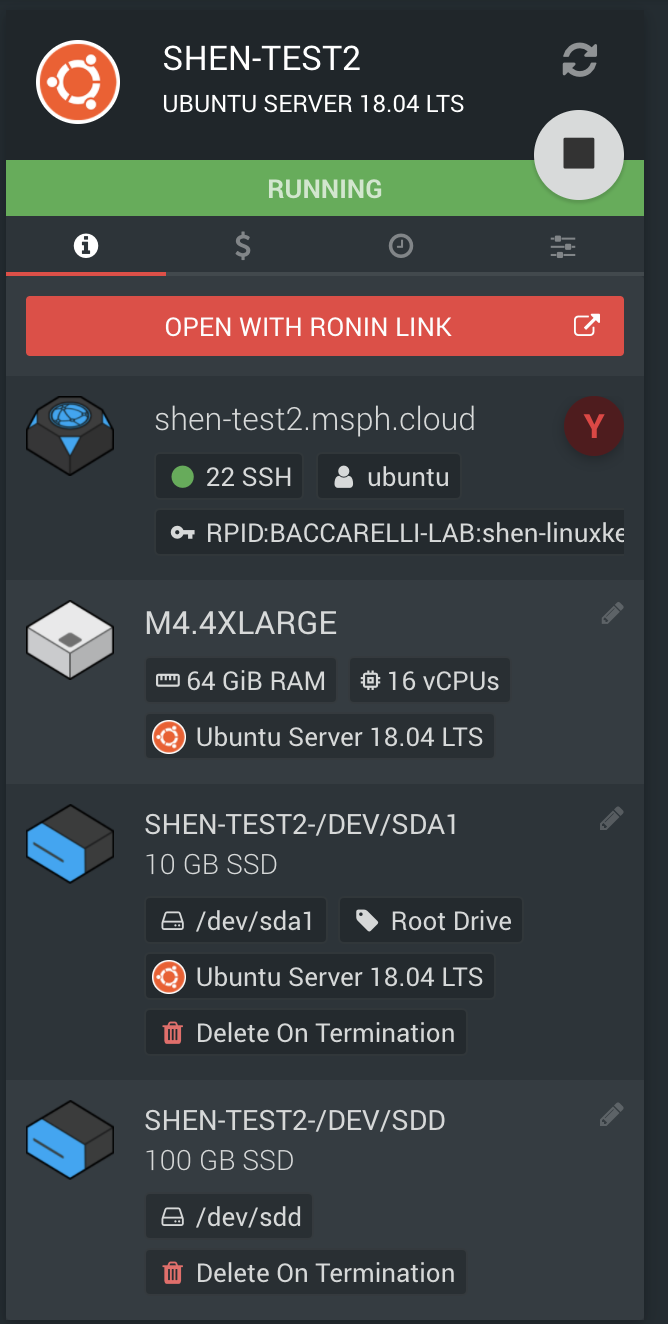

## Step2: Create your own machine-Slurm scheduler

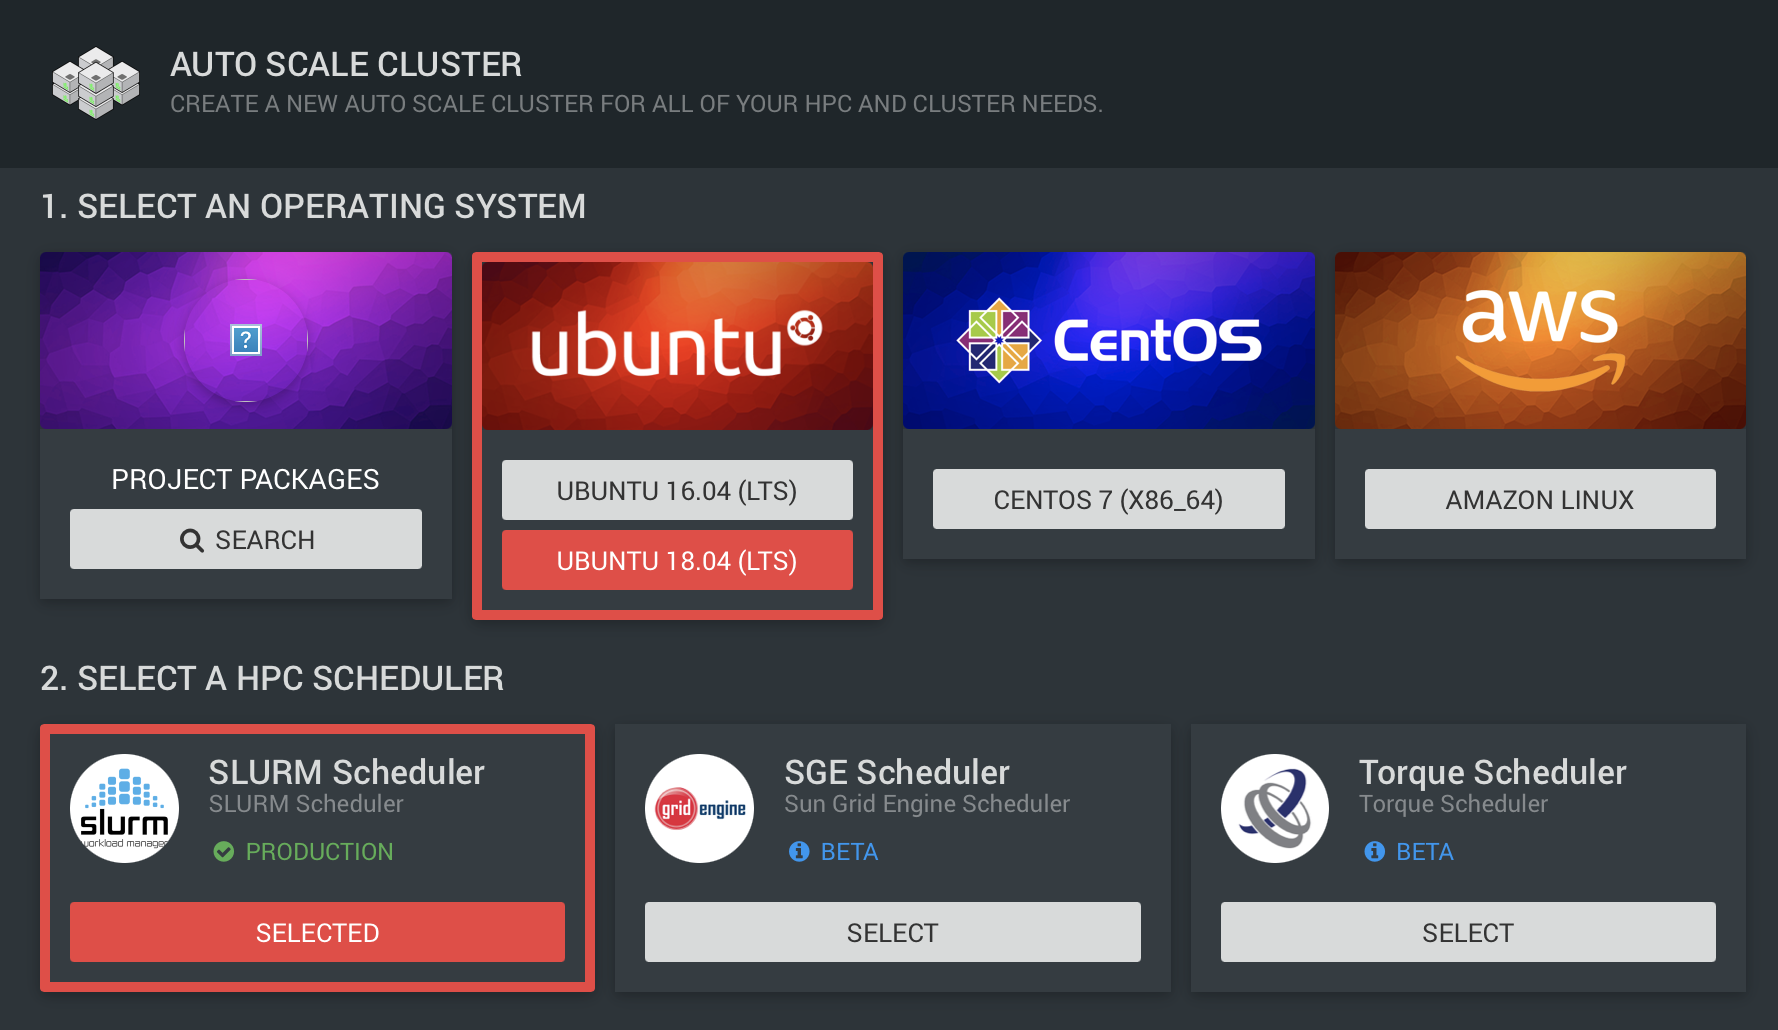
Keep the master node small (the masternode keeps running when you have machine on). You can use compute optimized machine for master node
<br>
Keep your compute node to your computation need. The example is for microbiome data processing, so we choose a bigger node
<br>
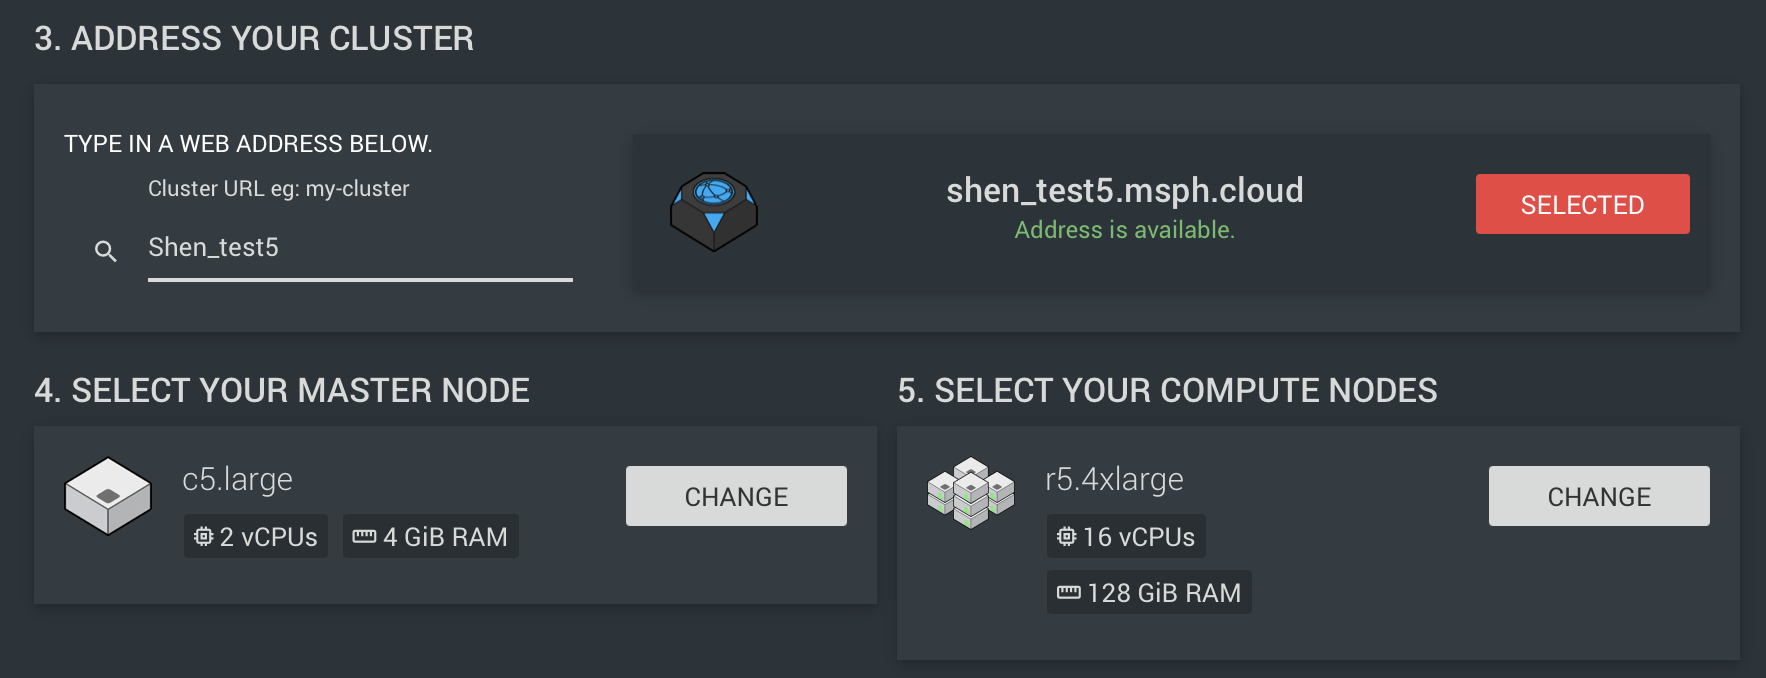

Minimum and maximum compute node is how many parellel machine you would like to launch
<br>
Spot price is cheaper, but your job will get cut in 2-3 hours! select depending on if your need.
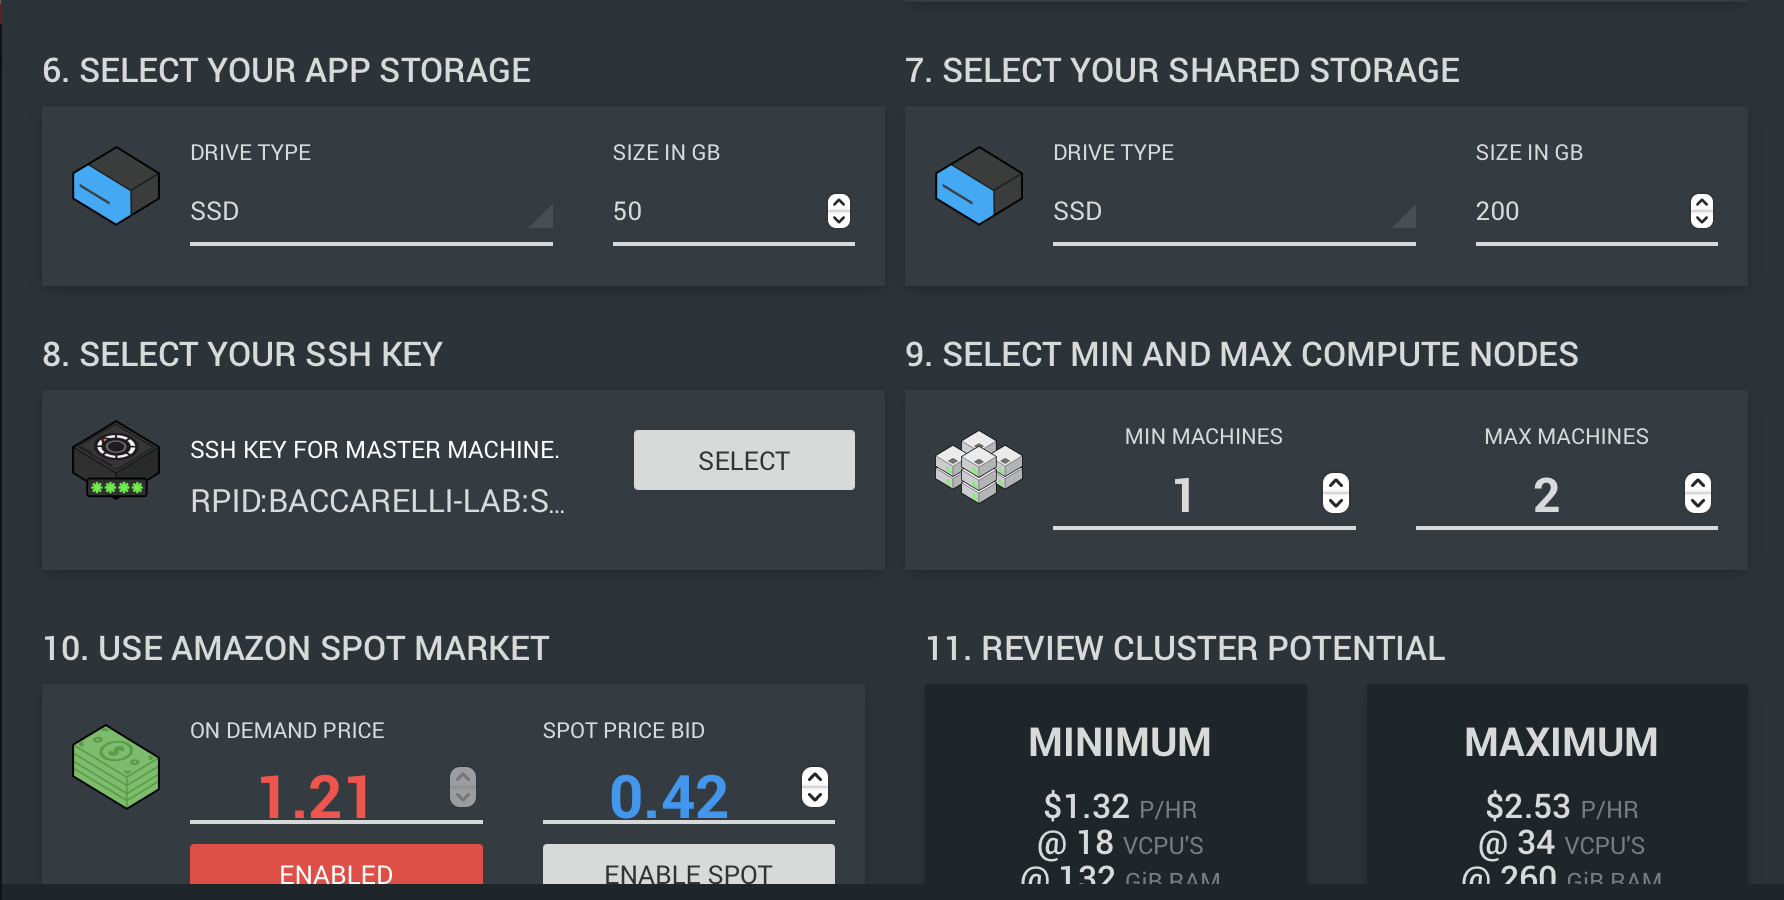
Review price and launch your slurm scheduler 
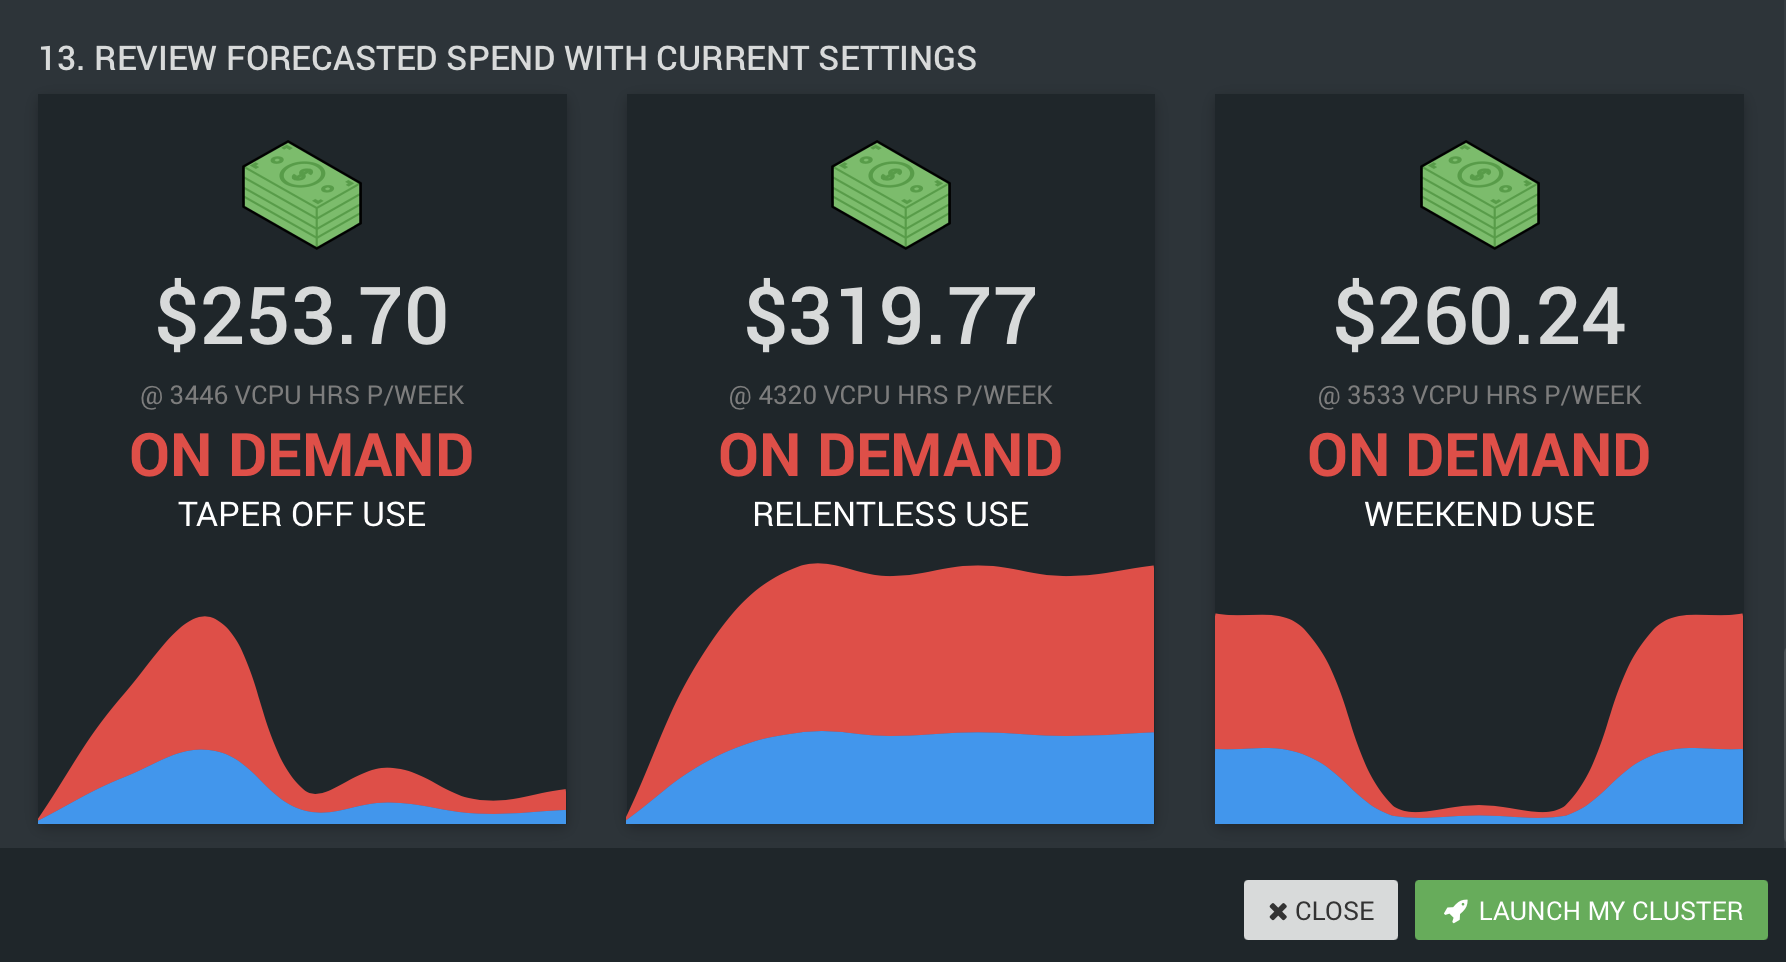

## Step3: Open with RONIN Link
<br>
Note: RONIN Link is the ssh command line interface, download RONIN link and launch
Follow the link: https://blog.ronin.cloud/ronin-link/
<br>
User Name:ubuntu
<br>
key: the key you downloaded in step2

After matching your key, click connect to machine


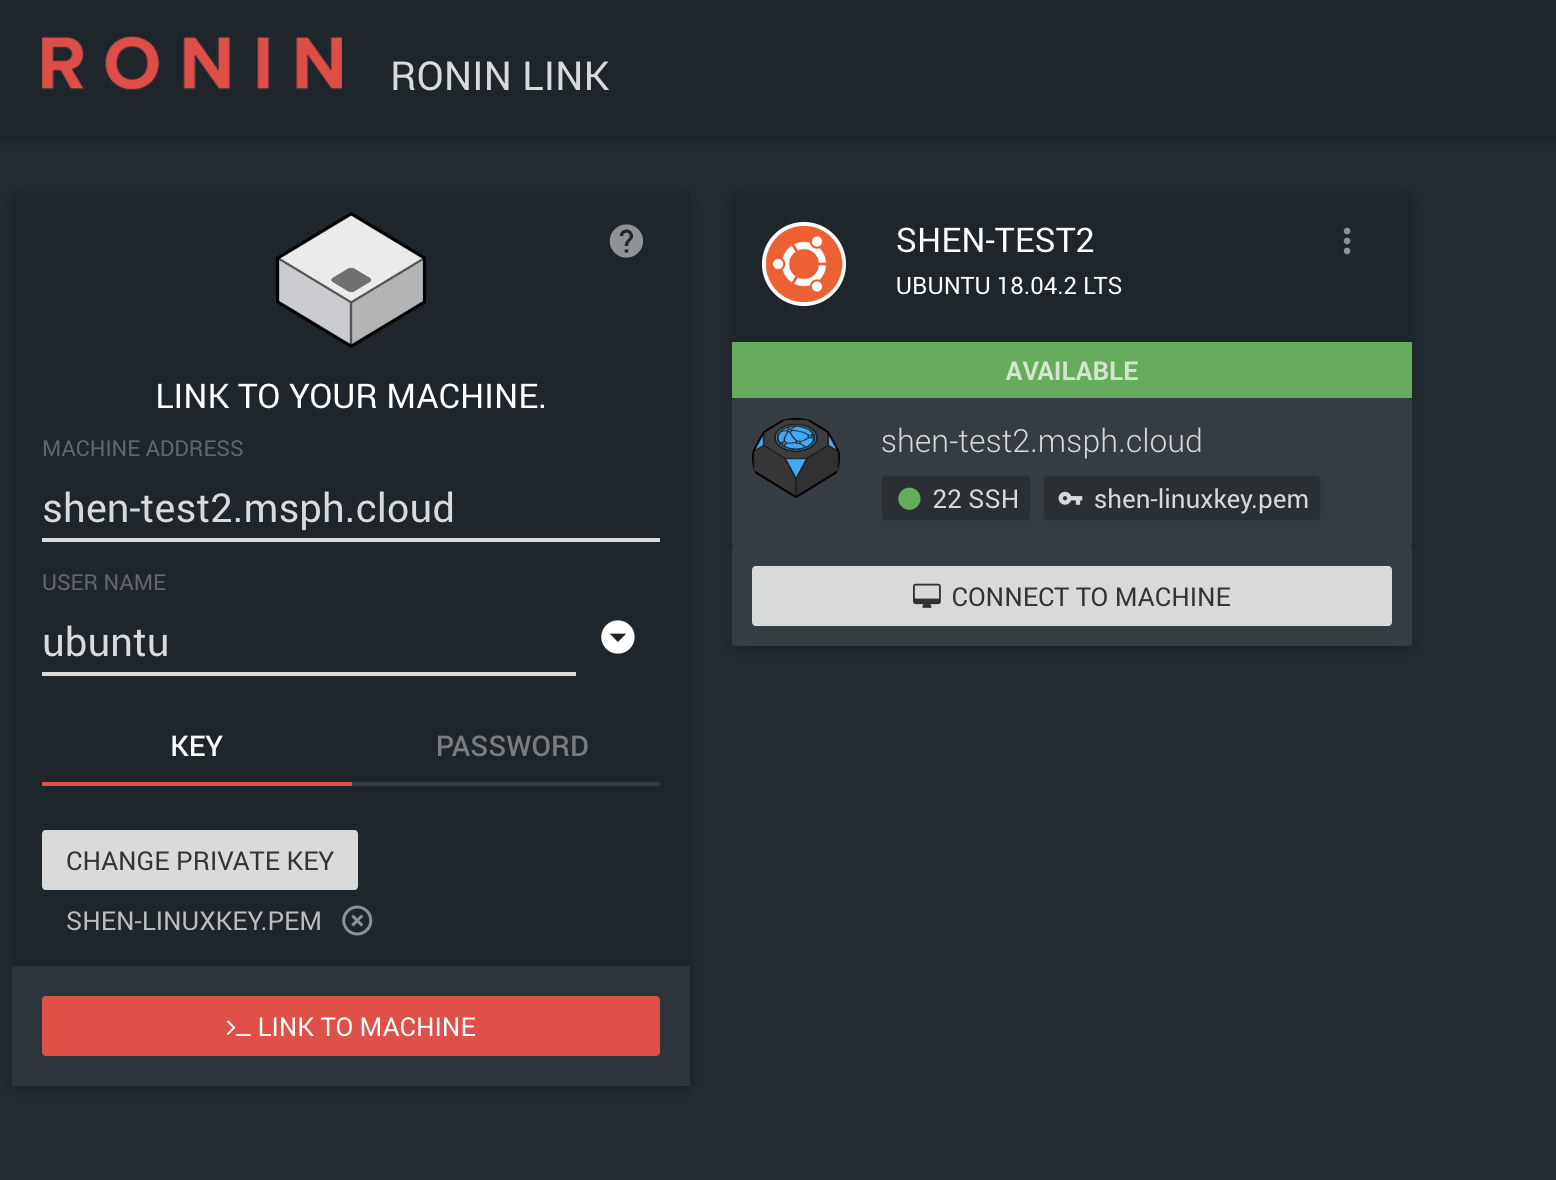

## You are now successfully in the linux ssh terminal

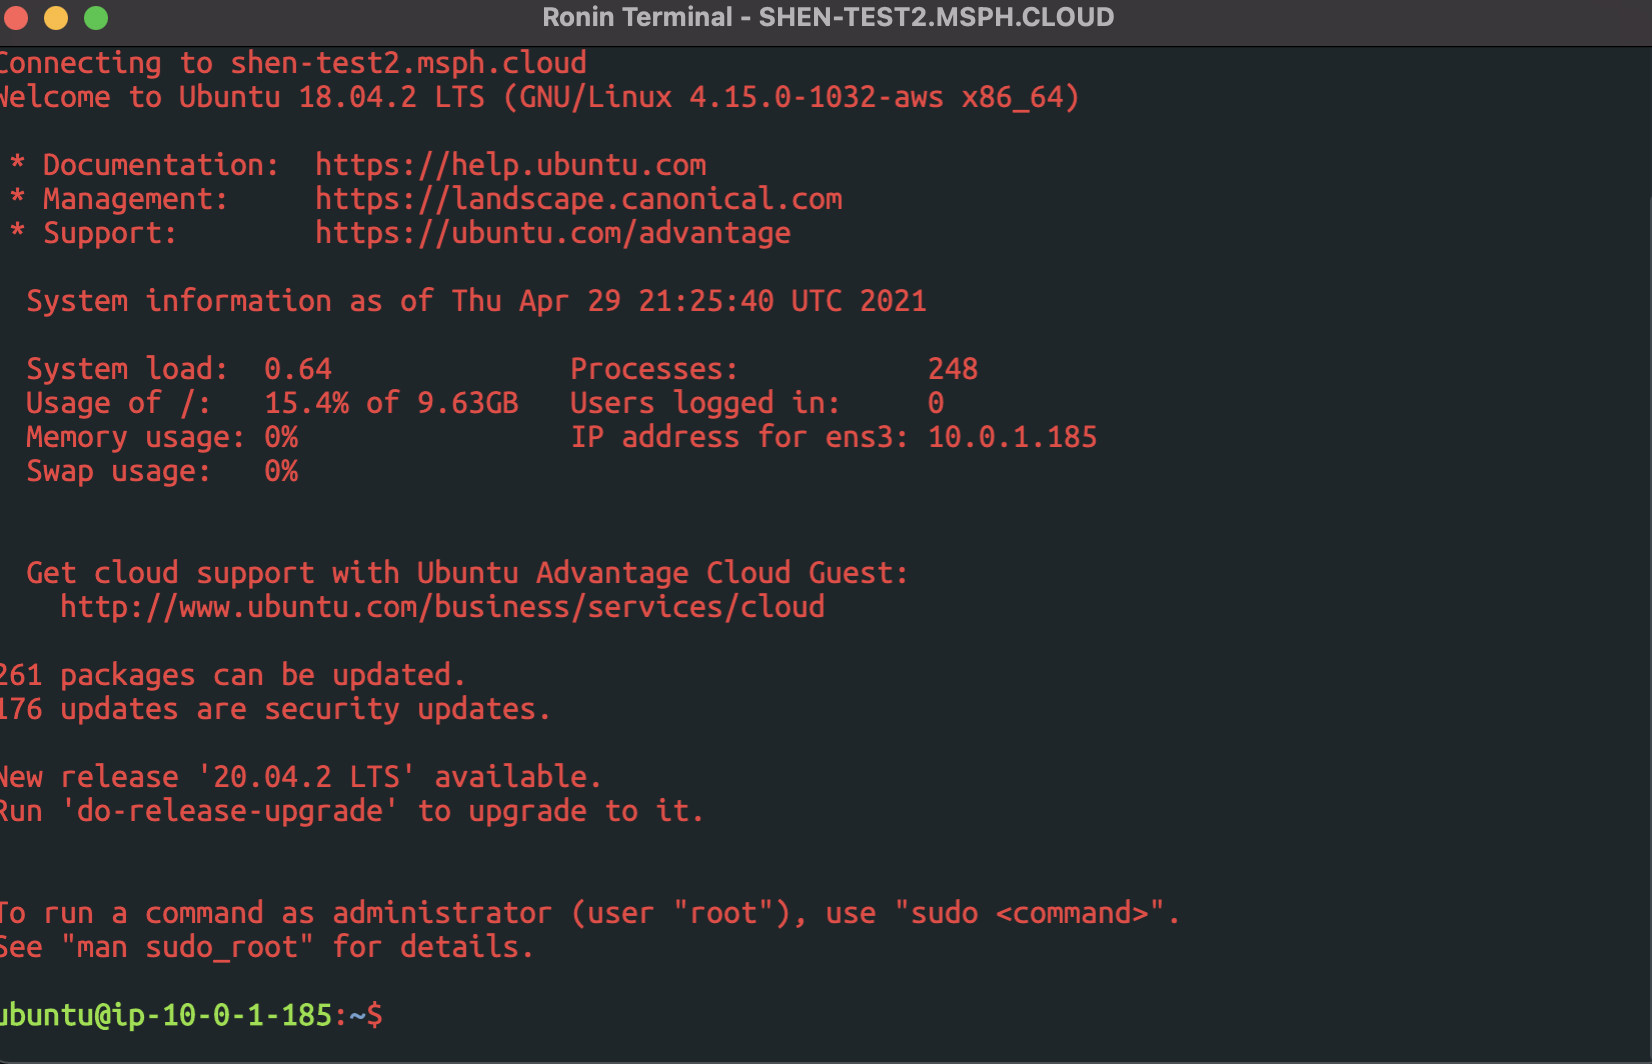

In [ ]:
##Please note
#You enter your ubuntu desktop directory as default
/home/ubuntu
# navigate to your root directory
cd /
# navigate to your home directory
cd /shared

#navigate to your ubuntu desktop
cd ../ubuntu
#very important! don't upload your data in your root directory

### Check your disk space and find the path to your home directory
df -H

#Beginners: Intro to unix, the unix file system:https://www.december.com/unix/tutor/filesystem.html

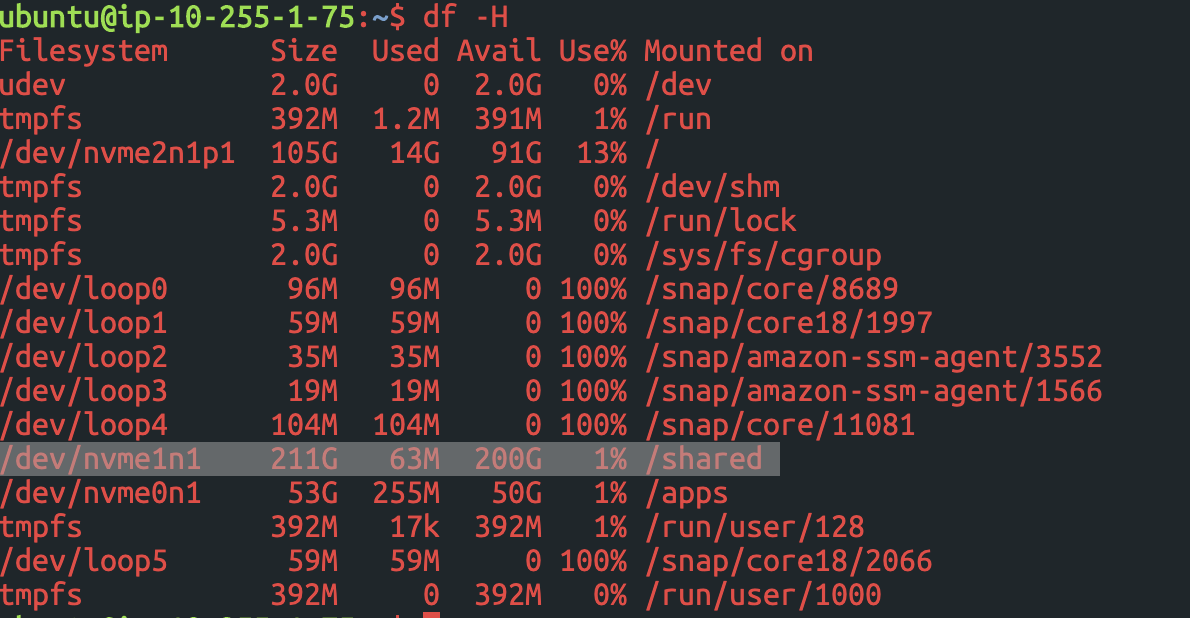

## Step 4: Monitor your HPC usage

In [ ]:
## Step4: Monitor your HPC usage using NETDATA - NO CLUSTER
#Install NETDATA HPC monitoring app
#- Monitor your HPC usage by installing NETDATA monitoring, follow steps: https://blog.ronin.cloud/netdata/
bash <(curl -Ss https://my-netdata.io/kickstart.sh)
#- Restart your terminal from RONIN link and enter 19999 in link an app to start using NETDATA
#- Monitor your data usage through their app
#- Close the NETDATA monitoring app after use! otherwise, the second time RONIN won't launch.

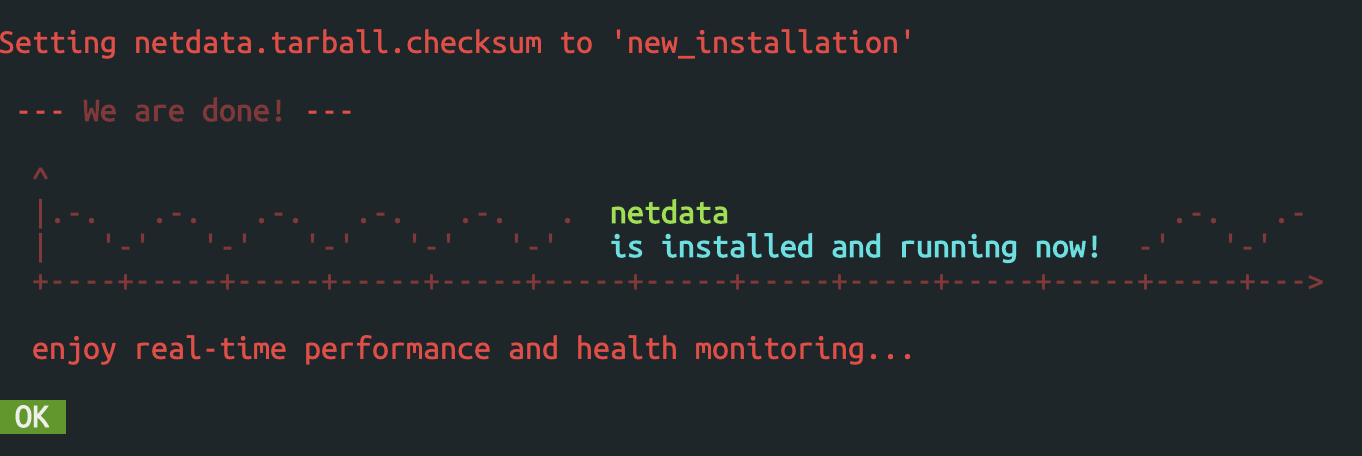

In [ ]:
## Step4: Monitor your HPC usage using Gangalia - Cluster
#read more from: https://blog.ronin.cloud/ganglia/


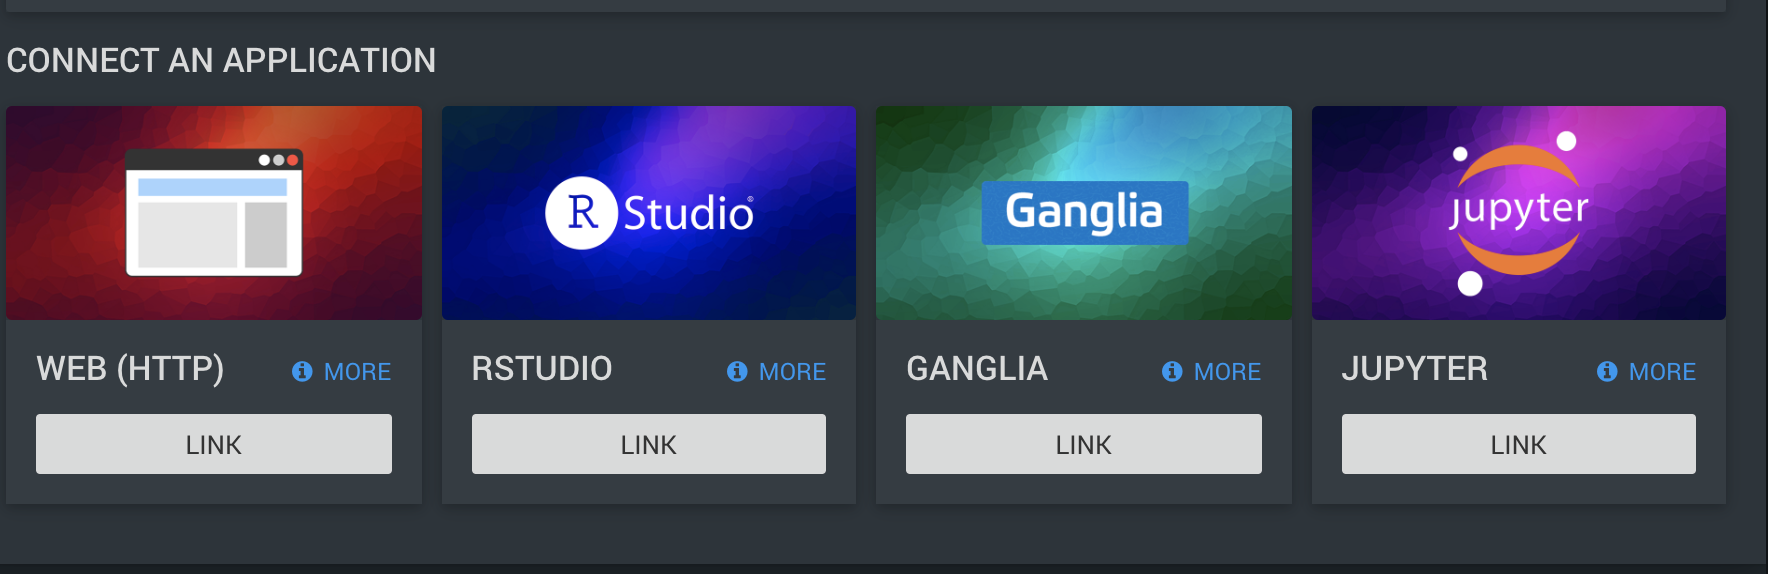

## Step5: launch your ubuntu desktop

Open the desktop from RONIN link. You can view html from ubuntu desktop

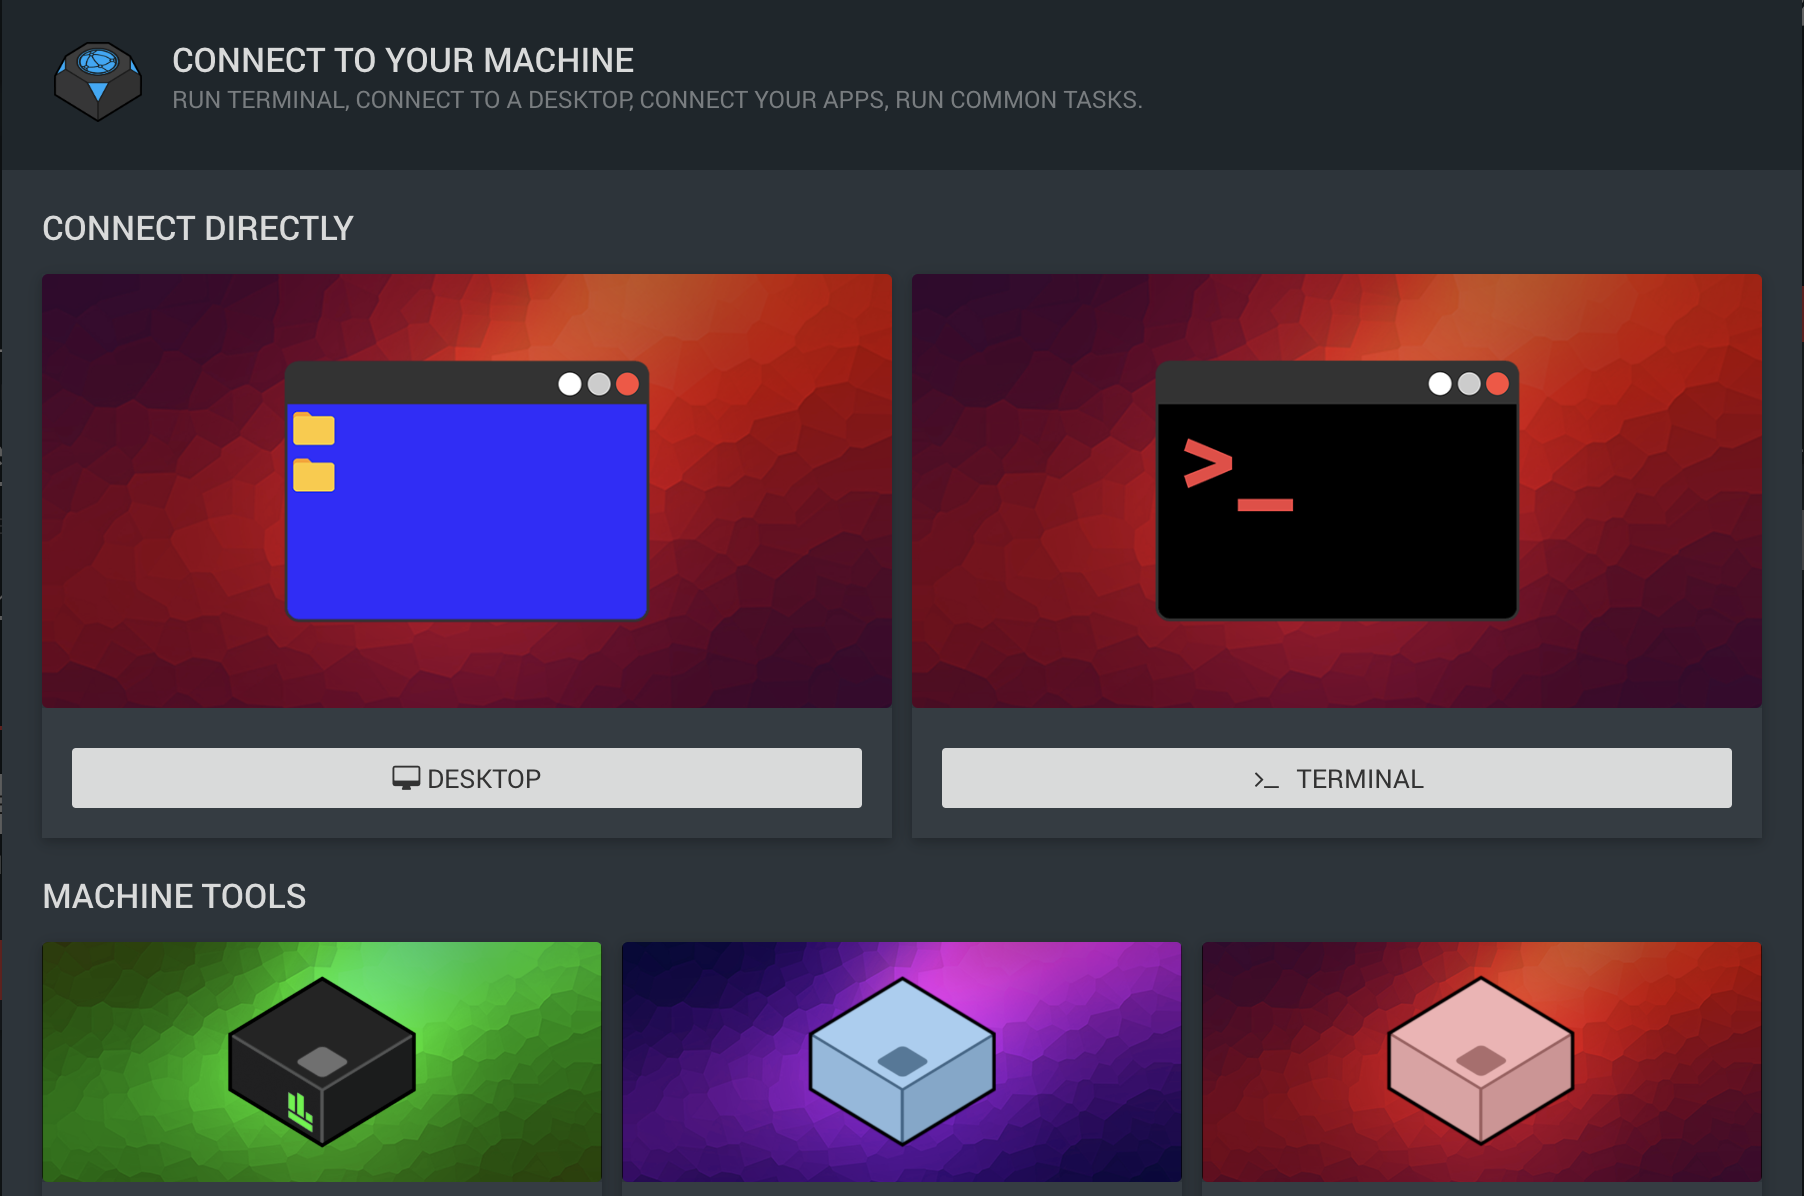

Access and open html files generated in the computation process
<br>
Attention: Files generated in command line interface is in /shared drive. You need to navigate to the drive to open files. This ubuntu desktop is under "/home/ubuntu"
<br?
- 5.1 Open file cabinet and click "Other Locations"
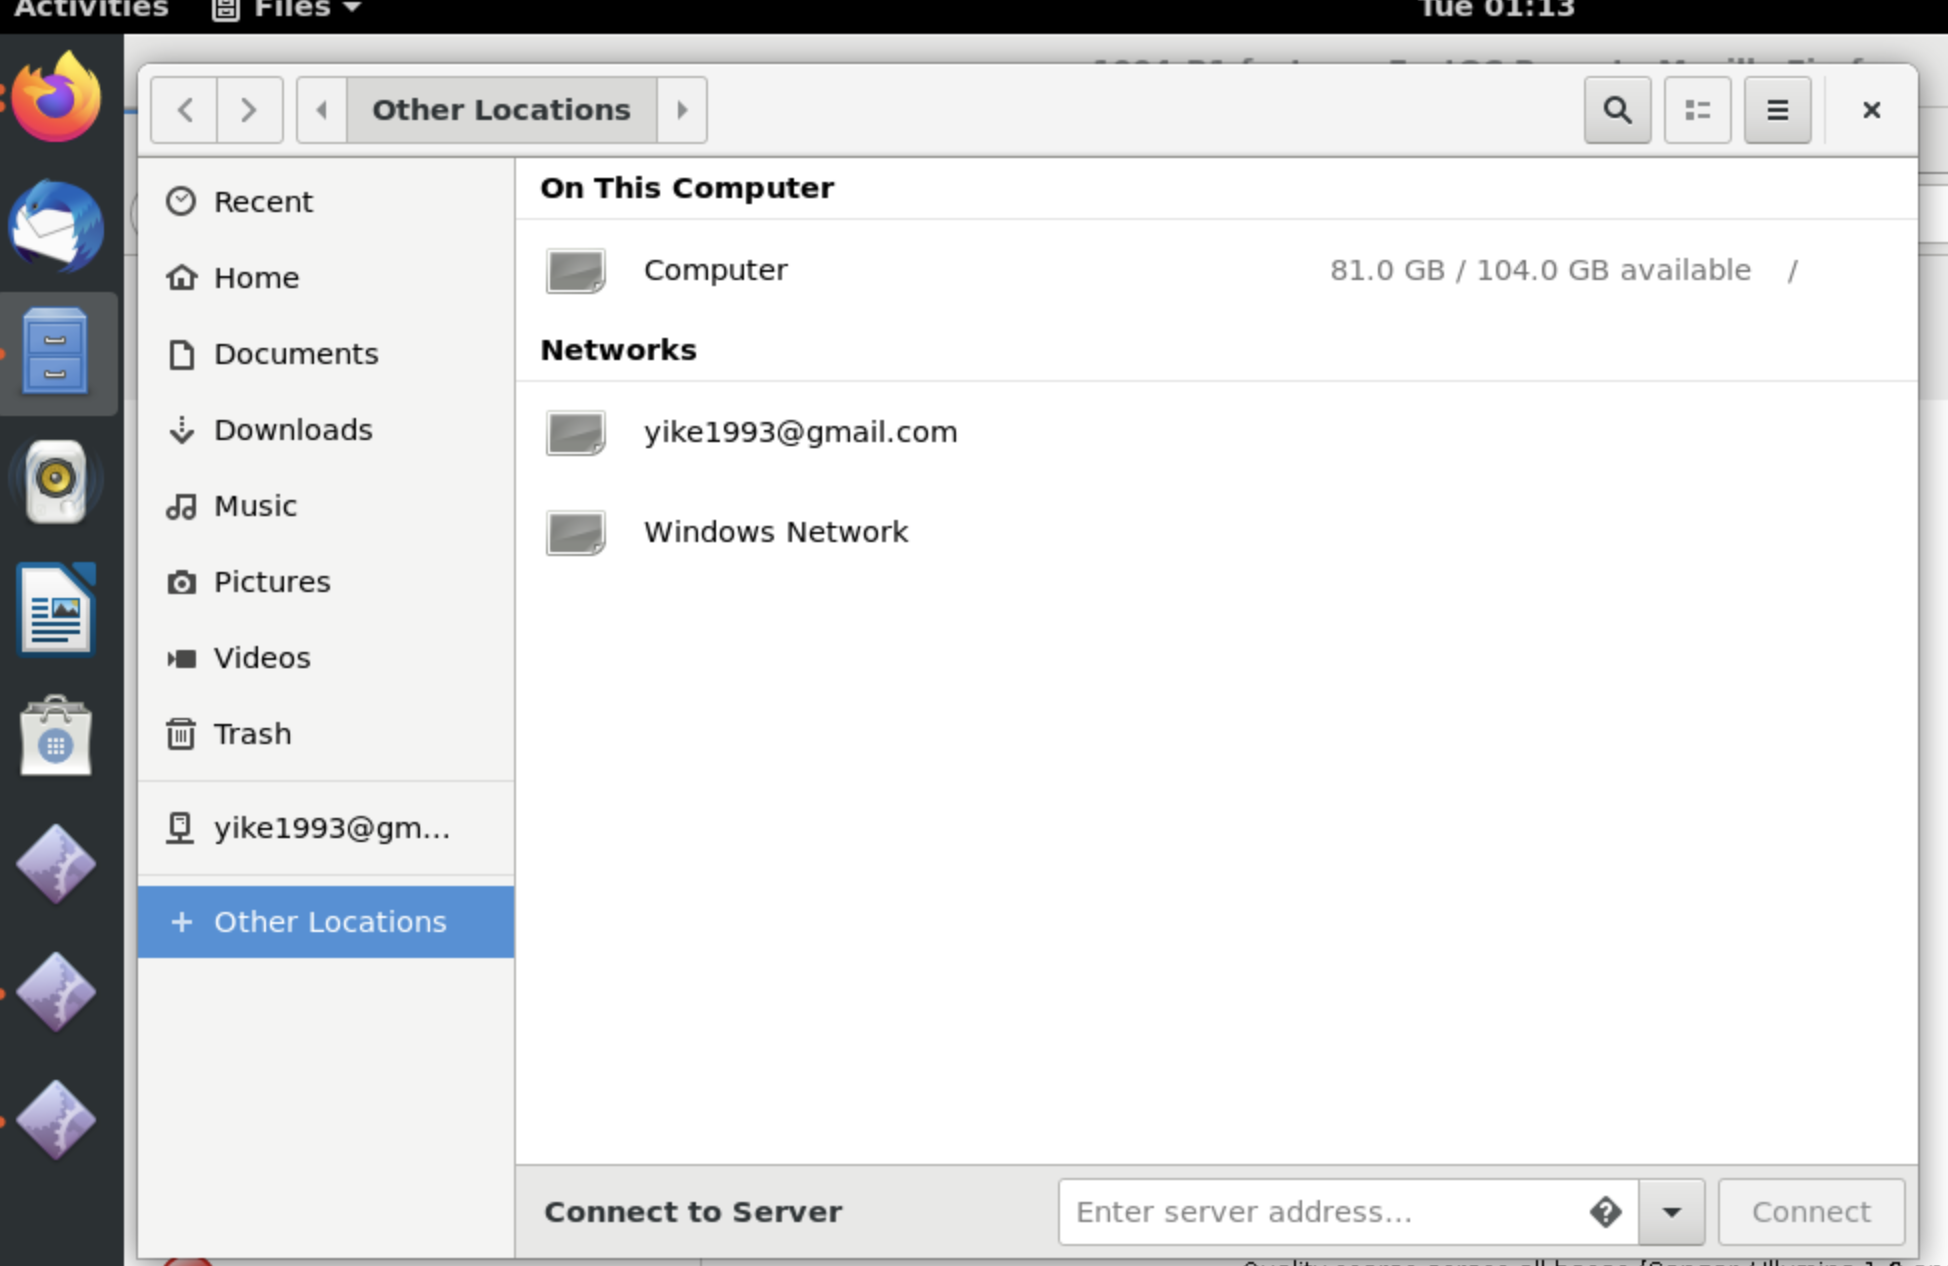

- 5.2 Open "Computer"
- 5.3 Locate "/shared" folder
- 5.4 You can now navigate to your HPC generated html file under firefox in ubuntu desktop
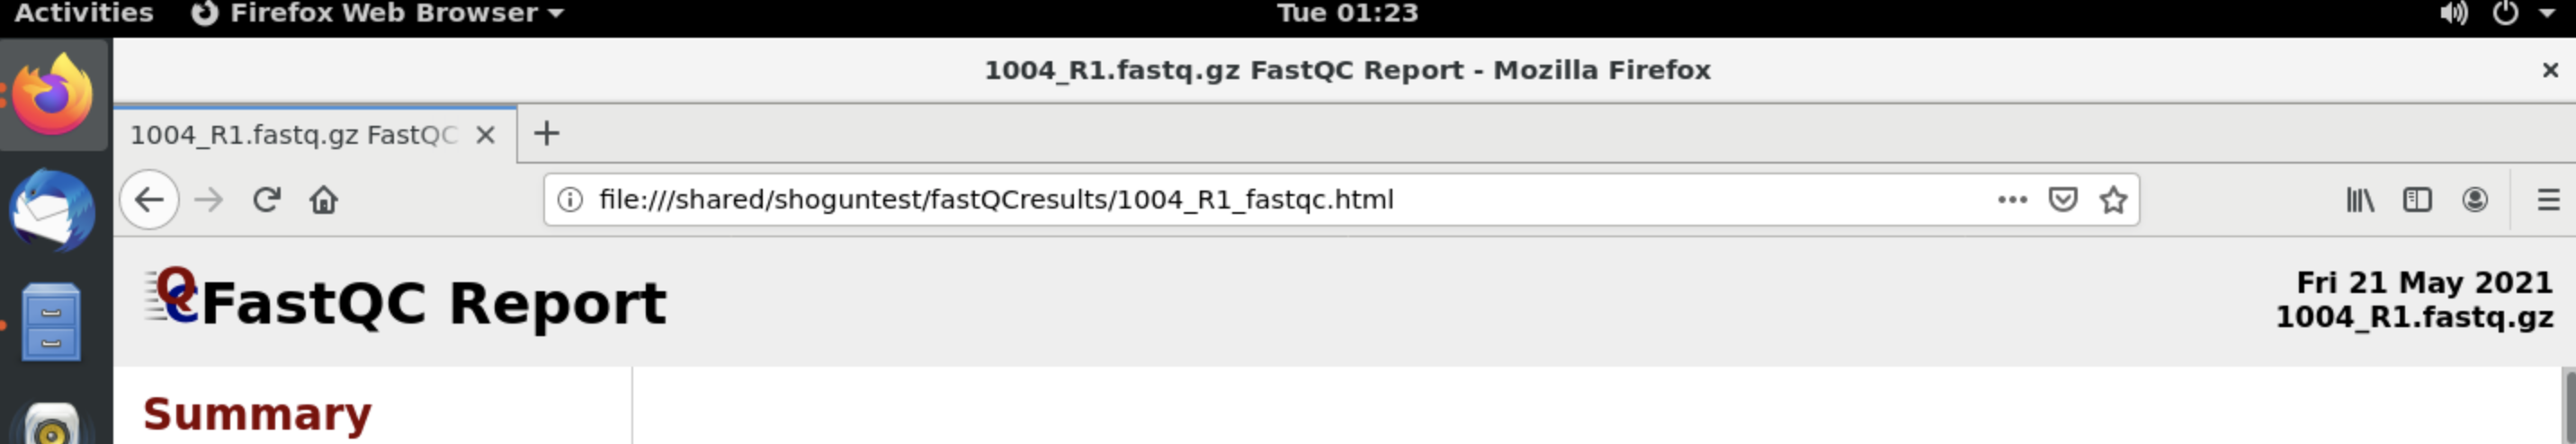



## Step 6 (optional): Pro command line users-ssh from terminal to RONIN machine

In [ ]:
# You can directly ssh to your RONIN machine by putting your key into your.ssh hidden directory

#Find all of your directory (including hidden one)
ls -al
#move your aws secret access key to the hidden directory
mv source target

#Obtain your RONIN machine name
shentest4.msph.cloud

#open a terminal and ssh to your RONIN machine
ssh -i ~/.ssh/shen-linuxkey_copy.pem ubuntu@shentest4.msph.cloud
ssh -i ~/.ssh/shen-linuxkey_copy.pem ubuntu@shentest5.msph.cloud
#Now you are connected to RONIN machine through terminal

#exit the RONIN machine
exit

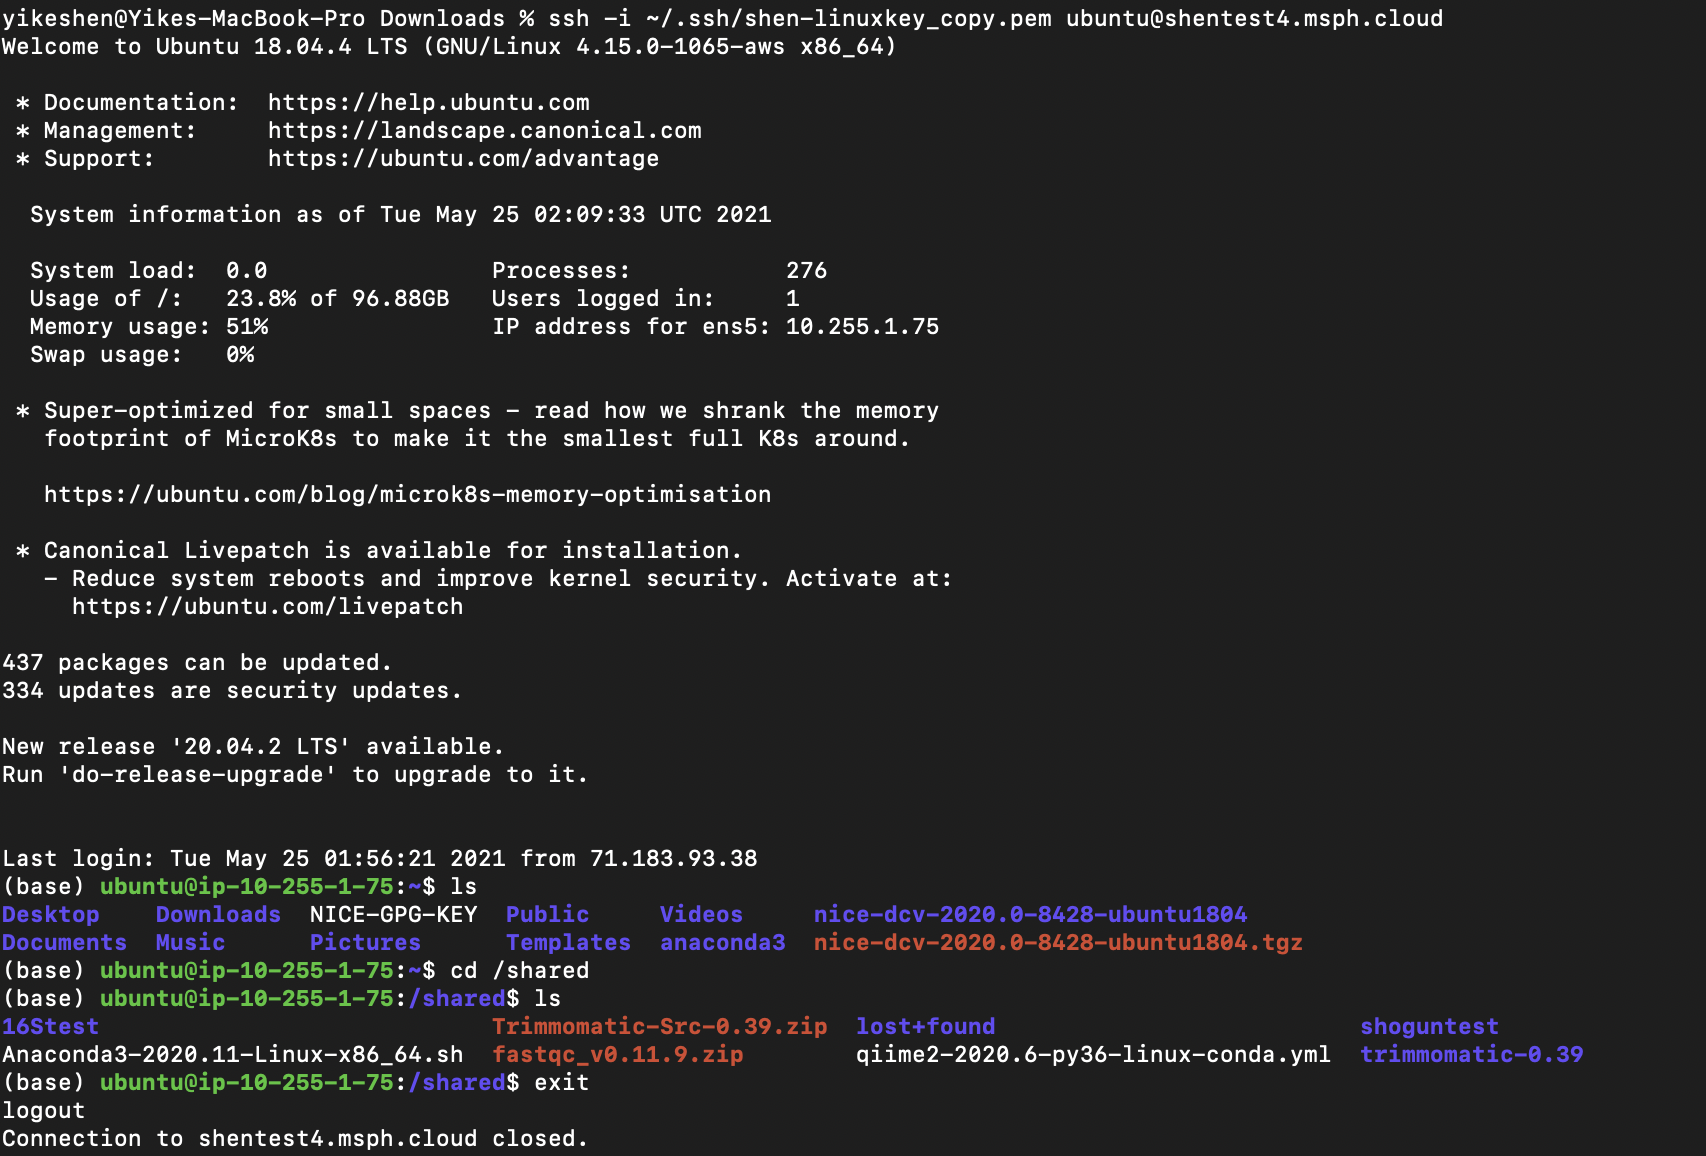

# Step7: package your cluster for future use

In [ ]:
#https://blog.ronin.cloud/packaging-a-cluster-with-software/
###Very Important#####
#The regular machine are not interchangable with autoscale clusters!
#That means, the package of regular machine can't be applied to autoscale clusters
#Package regular machine -> launch regular machine with package
#package autoscale cluster ->launch autoscale cluster with package

## Miscellaneous
- Autoscale clusters does not have R studio and Jupyter pre-configured. You need to either install them or launch a smaller single use machine just for R studio and Jupyter.
<br>
(Explanation from the developer: Not all the applications are installed on the cluster. Ganglia is the only pre install option for the clusters and it uses port 80 to connect to via ronin link. The other applications can be installed on the cluster if required. The ronin link shortcuts for rstudio and jupyter are link to the preconfigured single machines offered in ronin (jupyter is on the cuda image). You can also link any other port in ronin link from your desktop to the machine using the field above .

In [ ]:
#Permission issue after relaunch a cluster with previous pacakge
cd /shared
sudo chown ubuntu .
#then you will have the permission

In [ ]:
#hop to another terminal to watch
htop
scancel <job id or name>
qdel
spack find --paths bowtie2

In [ ]:
#backup disk
#https://blog.ronin.cloud/backups/
#mv ~/Downloads/shen-linuxkey.pem ~/.ssh/shen-linuxkey.pem && chmod 600 ~/.ssh/shen-linuxkey.pem